# Titanic - Machine Learning from Disaster
## XGBOOST



Questo progetto si concentra sull'analisi e la modellizzazione dei dati relativi al Titanic. Il progetto include i seguenti passaggi:

  - Esplorazione dei Dati: Analisi iniziale per comprendere la struttura del dataset, inclusi tipi di dati, statistiche descrittive e verifica di eventuali        valori mancanti.

  - Visualizzazione dei Dati: Creazione di grafici per visualizzare la distribuzione delle variabili, come istogrammi, boxplot e heatmap di correlazione.

  - Pulizia dei Dati: Rimozione di colonne non necessarie e gestione di eventuali anomalie nei dati.

  -  Scaling delle Caratteristiche: Normalizzazione delle variabili numeriche per migliorare le prestazioni dei modelli di machine learning.

   - Modellizzazione: Utilizzo di algoritmi di classificazione, come XGBoost.

- Valutazione del Modello: Misurazione delle prestazioni del modello attraverso metriche come accuratezza, precisione e richiamo, oltre a visualizzazioni come la matrice di confusione

In [1]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, f1_score, auc, recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer


In [2]:
df = pd.read_csv("dataset/train.csv", encoding='utf-8')


In [3]:
df_test = pd.read_csv("dataset/test.csv", encoding='utf-8')


In [4]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
#df_test.set_index('PassengerId', inplace=True)
#print(df_test)


In [6]:
#df.set_index('PassengerId', inplace=True)
#print(df)


## DATA VISUALIZATION

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## CLEANING E PREPROCESSING


In [12]:
df_test = df_test .drop(columns=['Name', 'Ticket', 'Cabin' ])

In [13]:
df = df.drop(columns=['Name', 'Ticket', 'Cabin', ])

In [14]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [15]:
df_test['Sex'] = df_test['Sex'].map({'male': 0, 'female': 1})

In [16]:
imputer = KNNImputer(n_neighbors=5)
df[['Age']] = imputer.fit_transform(df[['Age']])

In [17]:
imputer = KNNImputer(n_neighbors=5)
df_test[['Fare']] = imputer.fit_transform(df_test[['Fare']])

In [18]:
imputer = KNNImputer(n_neighbors=5)
df_test[['Age']] = imputer.fit_transform(df_test[['Age']])

In [19]:
df['Embarked'] = df['Embarked'].astype('category').cat.codes
imputer = KNNImputer(n_neighbors=5)
df[['Embarked']] = imputer.fit_transform(df[['Embarked']])

In [20]:
df_test['Embarked'] = df_test['Embarked'].astype('category').cat.codes
imputer = KNNImputer(n_neighbors=5)
df_test[['Embarked']] = imputer.fit_transform(df_test[['Embarked']])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    float64
dtypes: float64(3), int64(6)
memory usage: 62.8 KB


In [22]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 26.2 KB


In [23]:
# Sposta 'IsFraud' come ultima colonna
df = df[[col for col in df.columns if col != 'Survived'] + ['Survived']]

# Visualizza il DataFrame aggiornato
print(df.head())

   PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Survived
0            1       3    0  22.0      1      0   7.2500       2.0         0
1            2       1    1  38.0      1      0  71.2833       0.0         1
2            3       3    1  26.0      0      0   7.9250       2.0         1
3            4       1    1  35.0      1      0  53.1000       2.0         1
4            5       3    0  35.0      0      0   8.0500       2.0         0


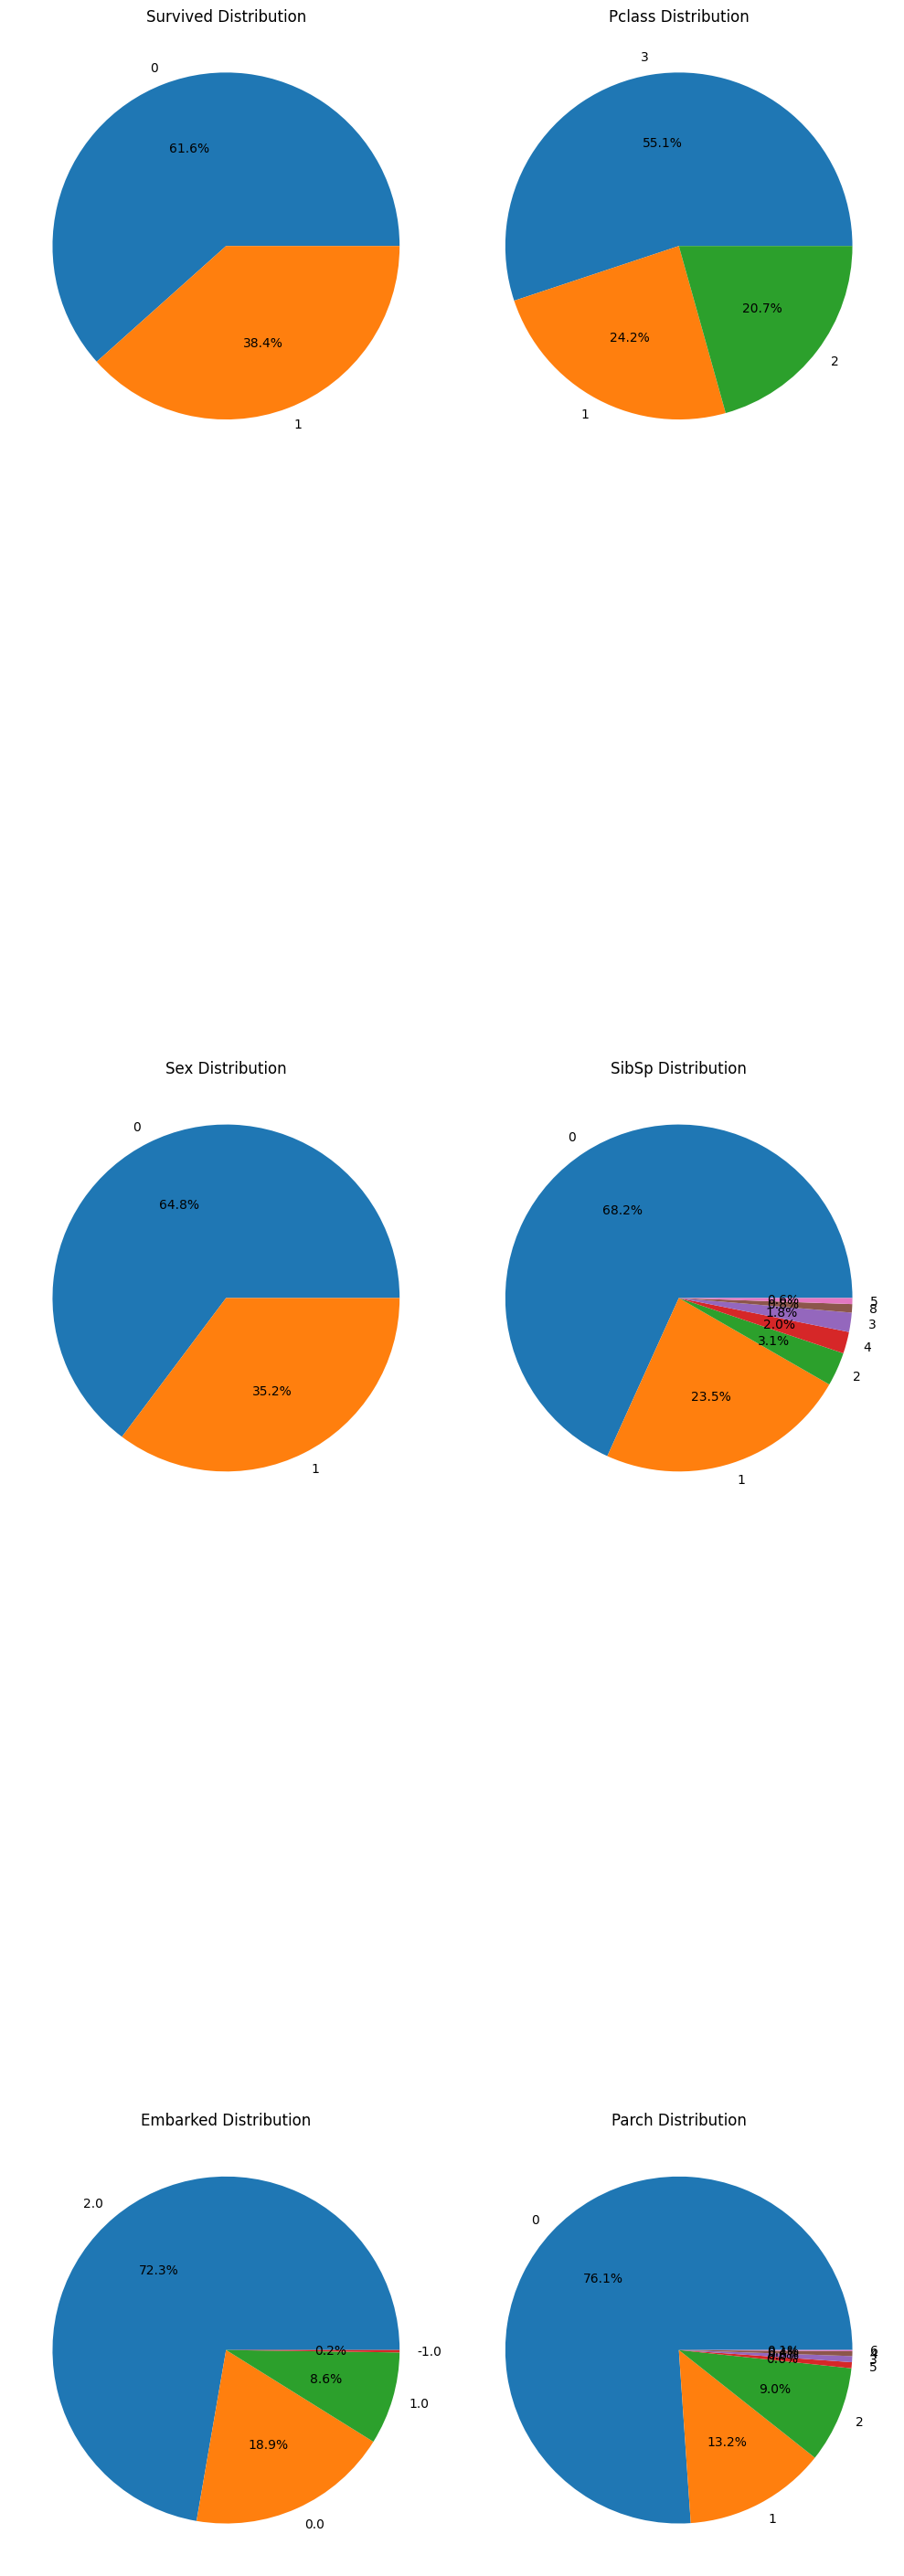

In [24]:
# Definizione delle colonne discrete
columns_d = [
    'Survived', 'Pclass', 'Sex', 'SibSp', 'Embarked',
    'Parch'
]

# Creazione della figura e degli assi con 2 colonne
fig, axs = plt.subplots(nrows=len(columns_d) // 2 + len(columns_d) % 2, ncols=2, figsize=(10, 40))

# Flatten degli assi per facilitarne l'iterazione
axs = axs.flatten()

for i, col in enumerate(columns_d):
    counts = df[col].value_counts()
    axs[i].pie(counts, labels=counts.index.astype(str), autopct='%1.1f%%')
    axs[i].set_title(f'{col} Distribution')

# Rimozione degli assi non utilizzati (nel caso di un numero dispari di colonne)
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

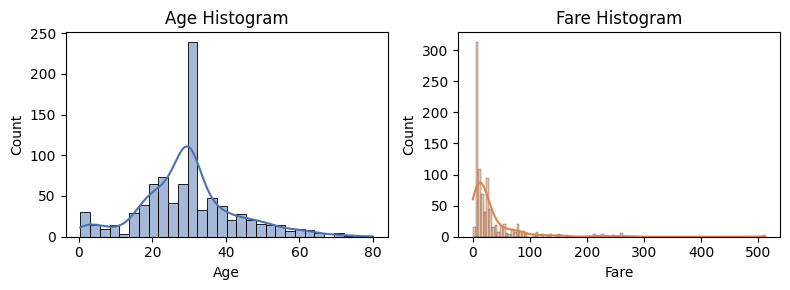

In [25]:


# Lista delle colonne numeriche continue
columns_s = ['Age', 'Fare']

# Numero di colonne per riga
n_cols = 2
n_rows = (len(columns_s) + n_cols - 1) // n_cols  # Calcolo il numero di righe necessarie

# Creazione di una griglia di sottotrame
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(8, 3 * n_rows))

# Appiattire l'array di assi per iterare facilmente
axs = axs.flatten()

# Genera una palette di colori diversi
colors = sns.color_palette("deep", len(columns_s))  

# Ciclo per generare un istogramma per ogni colonna con colori differenti
for i, (col, color) in enumerate(zip(columns_s, colors)):
    sns.histplot(df[col], kde=True, ax=axs[i], color=color)  # Grafico dell'istogramma con KDE
    axs[i].set_title(f'{col} Histogram')  # Titolo con il nome della colonna
    axs[i].set_xlabel(col)  # Etichetta asse X con il nome della colonna
    axs[i].set_ylabel('Count')  # Etichetta asse Y come Conteggio

# Rimuove eventuali sottotrame vuote nel caso in cui il numero di grafici sia dispari
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()  # Aggiusta gli spazi tra i grafici
plt.show()


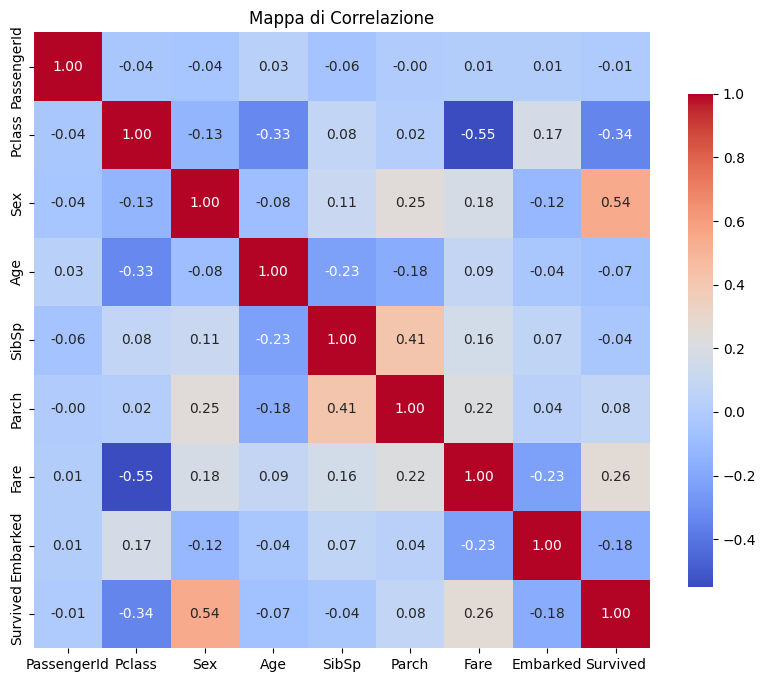

In [26]:
# Calcola la matrice di correlazione
correlation_matrix = df.corr()

# Imposta la dimensione della figura
plt.figure(figsize=(10, 8))

# Crea la mappa di correlazione
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Aggiungi titolo
plt.title('Mappa di Correlazione')

# Mostra la mappa
plt.show()

## 

## MODELING

In [27]:
scaler = StandardScaler()

# Separa le colonne che desideri scalare (ad esempio tutte le colonne tranne quelle target o categoriche)
# Supponiamo che l'ultima colonna sia il target, quindi escludiamo quella
features = df.iloc[:, :-1]  # Tutte le colonne tranne l'ultima
target = df.iloc[:, -1]     # L'ultima colonna (target)

# Applica lo scaler solo alle features
scaled_features = scaler.fit_transform(features)

# Crea un nuovo DataFrame con le feature scalate e il target originale
scaled_dataset = pd.DataFrame(scaled_features, columns=features.columns)
scaled_dataset['Survived'] = target

# Visualizza il dataset scalato
print(scaled_dataset.head())

   PassengerId    Pclass       Sex       Age     SibSp     Parch      Fare  \
0    -1.730108  0.827377 -0.737695 -0.592481  0.432793 -0.473674 -0.502445   
1    -1.726220 -1.566107  1.355574  0.638789  0.432793 -0.473674  0.786845   
2    -1.722332  0.827377  1.355574 -0.284663 -0.474545 -0.473674 -0.488854   
3    -1.718444 -1.566107  1.355574  0.407926  0.432793 -0.473674  0.420730   
4    -1.714556  0.827377 -0.737695  0.407926 -0.474545 -0.473674 -0.486337   

   Embarked  Survived  
0  0.587966         0  
1 -1.912644         1  
2  0.587966         1  
3  0.587966         1  
4  0.587966         0  


In [28]:
x, y = scaled_dataset.iloc[:,:-1], scaled_dataset.iloc[:,-1]
print(y)
print(x)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64
     PassengerId    Pclass       Sex       Age     SibSp     Parch      Fare  \
0      -1.730108  0.827377 -0.737695 -0.592481  0.432793 -0.473674 -0.502445   
1      -1.726220 -1.566107  1.355574  0.638789  0.432793 -0.473674  0.786845   
2      -1.722332  0.827377  1.355574 -0.284663 -0.474545 -0.473674 -0.488854   
3      -1.718444 -1.566107  1.355574  0.407926  0.432793 -0.473674  0.420730   
4      -1.714556  0.827377 -0.737695  0.407926 -0.474545 -0.473674 -0.486337   
..           ...       ...       ...       ...       ...       ...       ...   
886     1.714556 -0.369365 -0.737695 -0.207709 -0.474545 -0.473674 -0.386671   
887     1.718444 -1.566107  1.355574 -0.823344 -0.474545 -0.473674 -0.044381   
888     1.722332  0.827377  1.355574  0.000000  0.432793  2.008933 -0.176263   
889     1.726220 -1.566107 -0.737695 -0.284663 -0.474545 -0

In [29]:
 target_column = 'Survived'

In [30]:
x, y = df.iloc[:,:-1], df.iloc[:,-1]
print(y)
print(x)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64
     PassengerId  Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0              1       3    0  22.000000      1      0   7.2500       2.0
1              2       1    1  38.000000      1      0  71.2833       0.0
2              3       3    1  26.000000      0      0   7.9250       2.0
3              4       1    1  35.000000      1      0  53.1000       2.0
4              5       3    0  35.000000      0      0   8.0500       2.0
..           ...     ...  ...        ...    ...    ...      ...       ...
886          887       2    0  27.000000      0      0  13.0000       2.0
887          888       1    1  19.000000      0      0  30.0000       2.0
888          889       3    1  29.699118      1      2  23.4500       2.0
889          890       1    0  26.000000      0      0  30.0000       0.0
890          891       3    0  32.000000     

In [31]:
print(x.shape)  # Dimensioni del set di feature
print(y.shape)

(891, 8)
(891,)


In [32]:
data_dmatrix = xgb.DMatrix(data=x, label=y)

In [33]:
# Suddivisione del dataset in train-val e test
x_trainval, x_test, y_trainval, y_test = train_test_split(x, y, test_size=0.10, random_state=42)

# Suddivisione del train-val in train e validation

x_train, x_valid, y_train, y_valid = train_test_split(x_trainval, y_trainval, test_size=0.20, random_state=42)

# Inizializzazione del modello XGBoost
xg_clf = XGBClassifier(objective='binary:logistic', random_state=42)

# Definizione del parametro per la GridSearchCV
param_grid = {
    'colsample_bytree': [0.2, 0.3, 0.4],
    'n_estimators': [50, 75, 100, 150, 200, 300, 500],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.001, 0.01, 0.1, 0.3],
    'alpha': [5, 10, 20],
}

# Ricerca degli iperparametri tramite GridSearchCV sui dati di train 
grid_search = GridSearchCV(xg_clf, param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)  # Fit sulla parte di training

# Miglior modello
best_xg_clf = grid_search.best_estimator_

# Predizione sul test set
y_pred = best_xg_clf.predict(x_test)

/home/linux/myenv/lib/python3.10/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [34]:
print(f"Best parameters for Decision Tree:", best_xg_clf)


Best parameters for Decision Tree: XGBClassifier(alpha=20, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, ...)





## RISULTATI

In [35]:

# Valutare le prestazioni del modello sul test set
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Report di classificazione
print(classification_report(y_test, y_pred))


Precision: 0.8695652173913043
              precision    recall  f1-score   support

           0       0.76      0.94      0.84        54
           1       0.87      0.56      0.68        36

    accuracy                           0.79        90
   macro avg       0.82      0.75      0.76        90
weighted avg       0.80      0.79      0.78        90



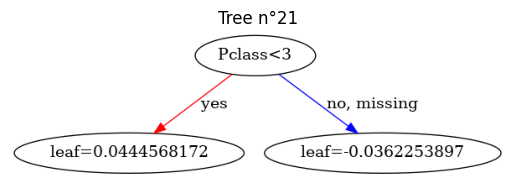

In [36]:
# visualizzazione di uno degli alberi  decisionali utilizzati dal modello
# addestrato

idx = np.random.randint(0, 100)
xgb.plot_tree(best_xg_clf, num_trees=1)
plt.rcParams['figure.figsize'] = [30, 15]
plt.title('Tree n°' + str(idx))
plt.show()

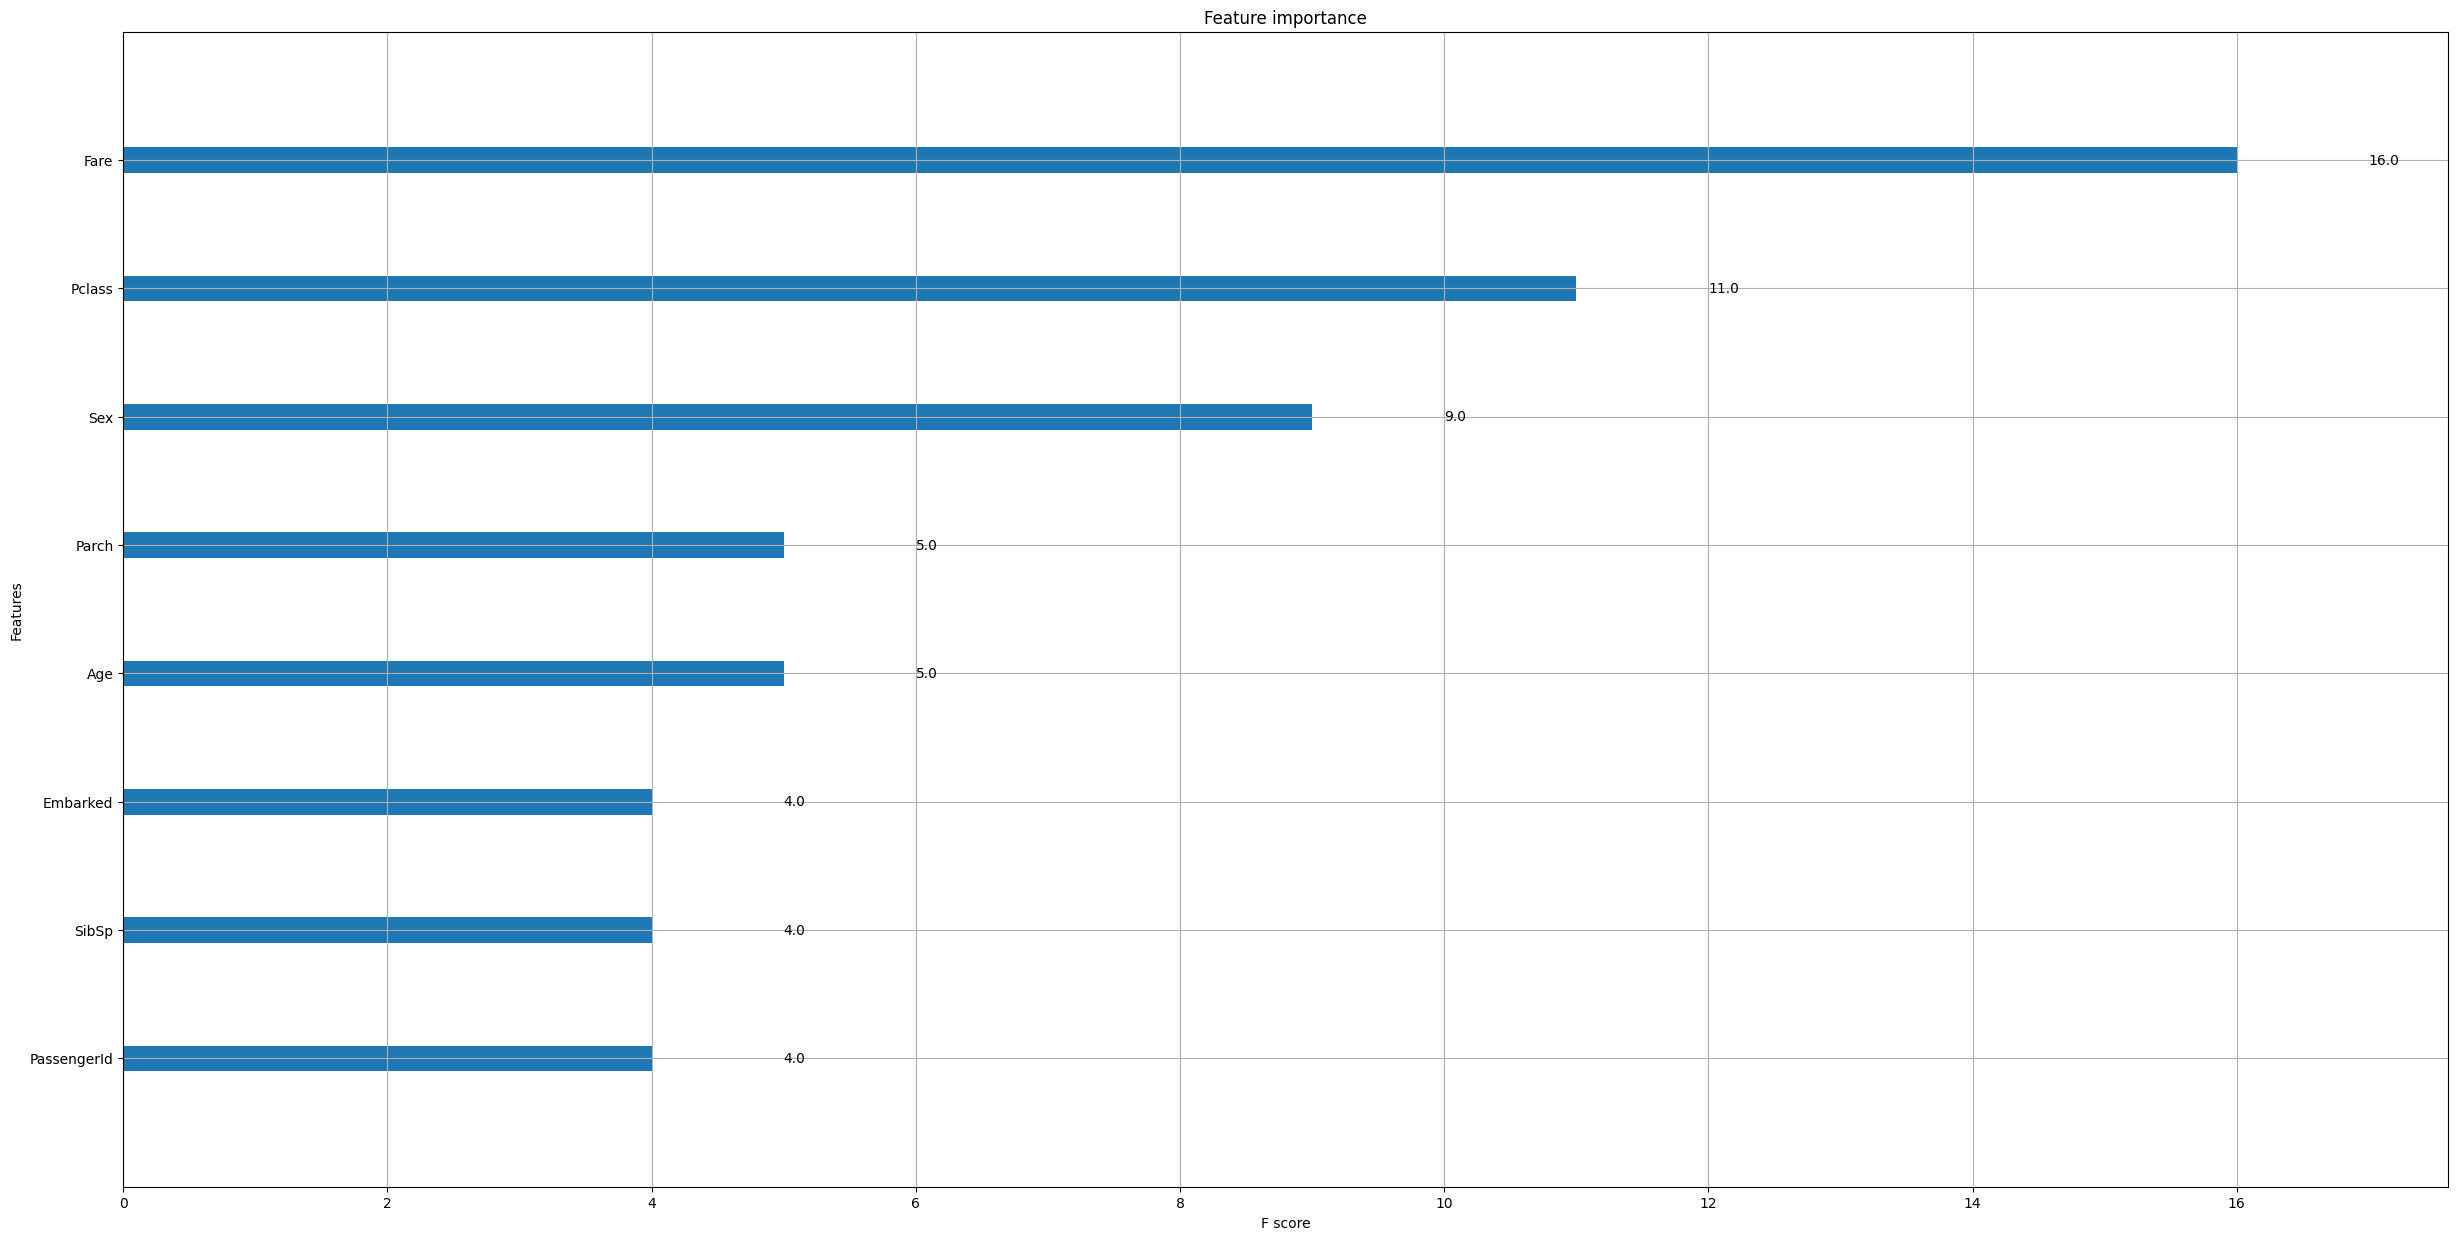

In [37]:
xgb.plot_importance(best_xg_clf)
plt.rcParams['figure.figsize'] = [10, 15]
plt.show()

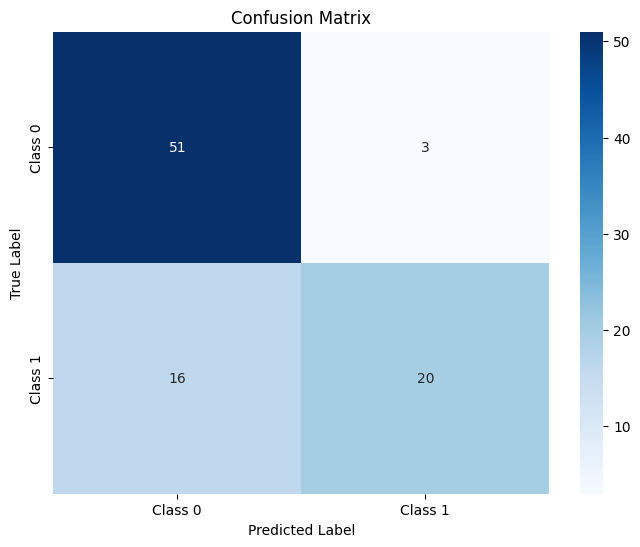

In [38]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

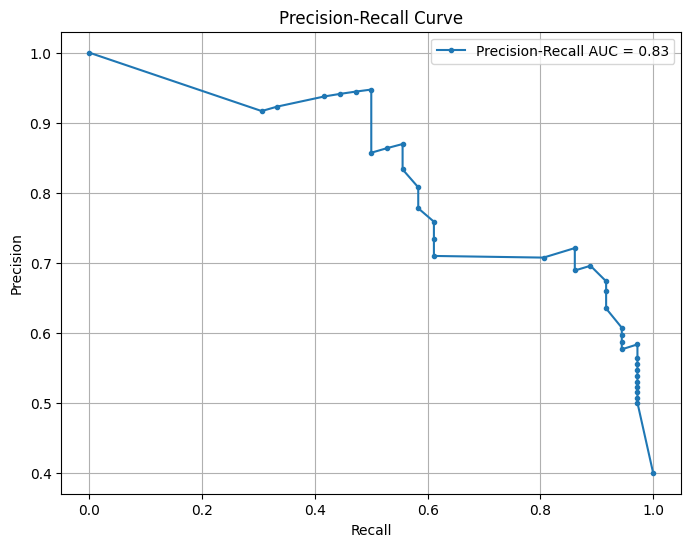

Precision for Survived label using XGBoost classifier: [0.4        0.5        0.50724638 0.51470588 0.52238806 0.53030303
 0.53846154 0.546875   0.55555556 0.56451613 0.58333333 0.57627119
 0.5862069  0.59649123 0.60714286 0.63461538 0.66       0.67346939
 0.69565217 0.68888889 0.72093023 0.70731707 0.70967742 0.73333333
 0.75862069 0.77777778 0.80769231 0.83333333 0.86956522 0.86363636
 0.85714286 0.94736842 0.94444444 0.94117647 0.9375     0.92307692
 0.91666667 1.        ]
F1 Score for Survived label using XGBoost classifier: 0.6779661016949152


In [39]:

 #Calcola le probabilità predette (predict_proba)
y_pred_proba = best_xg_clf.predict_proba(x_test)  # X_test è il tuo set di test

# Calcola le etichette predette (predict)
y_pred = best_xg_clf.predict(x_test)

# Controlla se il problema è di classificazione binaria
if len(best_xg_clf.classes_) == 2:
# Calcola precisione, richiamo e soglie usando il modello predittivo
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])
    
    # Calcolo F1 Score
    f1 = f1_score(y_test, y_pred)

    # Calcolo AUC per la curva Precision-Recall
    pr_auc = auc(recall, precision)

    # Plot della curva Precision-Recall
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, marker='.', label=f'Precision-Recall AUC = {pr_auc:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.grid()
    plt.show()

    # Stampa i valori di precisione e F1 score
    print(f"Precision for {target_column} label using XGBoost classifier:", precision)
    print(f"F1 Score for {target_column} label using XGBoost classifier:", f1)

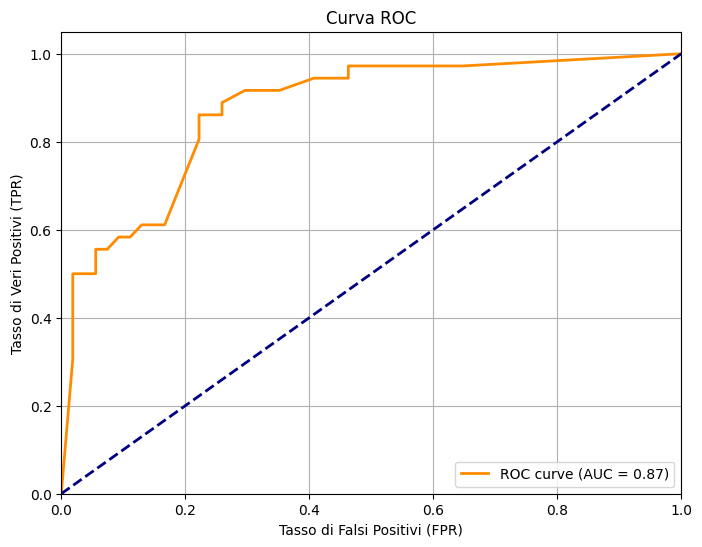

In [40]:

# Calcola le probabilità predette (predict_proba)
y_pred_proba = best_xg_clf.predict_proba(x_test)  # X_test è il set di test

# Calcola la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])

# Calcola l'Area sotto la curva (AUC)
roc_auc = auc(fpr, tpr)

# Plot della curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasso di Falsi Positivi (FPR)')
plt.ylabel('Tasso di Veri Positivi (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [41]:
import joblib

model = XGBClassifier()
model.fit(x_train, y_train)  

# Salva  modello
joblib.dump(model, 'titanic.pkl')


['titanic.pkl']

In [42]:
x_new = df_test[['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]  # Sostituisci con le tue feature

# 3. Effettua le predizioni
y_new_pred = best_xg_clf.predict(x_new)

# 4. Salva i risultati in un nuovo file CSV
results = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': y_new_pred})
results.to_csv('predic.csv', index=False)